# Multinomial Naïve Bayes

In [5]:
import pickle
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from pprint import pprint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import ShuffleSplit
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import random

First, we load the data:

In [6]:
# Dataframe
path_df = "C:/Users/asus-pc/Documents/PBA/Tugas Akhir/03. Feature Engineering/Pickles_title/df.pickle"
with open(path_df, 'rb') as data:
    df = pickle.load(data)

# features_train
path_features_train = "C:/Users/asus-pc/Documents/PBA/Tugas Akhir/03. Feature Engineering/Pickles_title/features_train.pickle"
with open(path_features_train, 'rb') as data:
    features_train = pickle.load(data)

# labels_train
path_labels_train = "C:/Users/asus-pc/Documents/PBA/Tugas Akhir/03. Feature Engineering/Pickles_title/labels_train.pickle"
with open(path_labels_train, 'rb') as data:
    labels_train = pickle.load(data)

# features_test
path_features_test = "C:/Users/asus-pc/Documents/PBA/Tugas Akhir/03. Feature Engineering/Pickles_title/features_test.pickle"
with open(path_features_test, 'rb') as data:
    features_test = pickle.load(data)

# labels_test
path_labels_test = "C:/Users/asus-pc/Documents/PBA/Tugas Akhir/03. Feature Engineering/Pickles_title/labels_test.pickle"
with open(path_labels_test, 'rb') as data:
    labels_test = pickle.load(data)

Let's check the dimension of our feature vectors:

In [7]:
print(features_train.shape)
print(features_test.shape)

(2676, 300)
(473, 300)


## Cross-Validation for Hyperparameter tuning

In the case of the Multinomial Naïve Bayes, we will not tune any hyperparameter.

In [8]:
mnbc = MultinomialNB()
mnbc

MultinomialNB()

Let's fit it and see how it performs:

## Model fit and performance

Now, we can fit the model to our training data:

In [9]:
mnbc.fit(features_train, labels_train)

MultinomialNB()

And get the predictions:

In [10]:
mnbc_pred = mnbc.predict(features_test)

The conditional class probabilities can be obtained by typing:

`mnbc_pred = mnbc.predict_proba(features_test)`

For performance analysis, we will use the confusion matrix, the classification report and the accuracy on both training and test data:

#### Training accuracy

In [11]:
# Training accuracy
print("The training accuracy is: ")
print(accuracy_score(labels_train, mnbc.predict(features_train)))

The training accuracy is: 
0.8912556053811659


#### Test accuracy

In [12]:
# Test accuracy
print("The test accuracy is: ")
print(accuracy_score(labels_test, mnbc_pred))

The test accuracy is: 
0.8731501057082452


#### Classification report

In [13]:
# Classification report
print("Classification report")
print(classification_report(labels_test,mnbc_pred))

Classification report
              precision    recall  f1-score   support

           0       0.91      0.97      0.94       226
           1       0.88      0.74      0.81        86
           2       0.79      0.68      0.74        73
           3       0.83      0.91      0.87        88

    accuracy                           0.87       473
   macro avg       0.85      0.83      0.84       473
weighted avg       0.87      0.87      0.87       473



#### Confusion matrix

notification of information


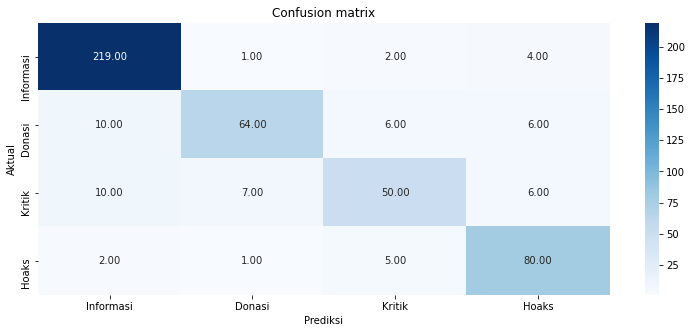

In [54]:
aux_df = df[['label', 'label_code']].drop_duplicates().sort_values('label_code')
conf_matrix = confusion_matrix(labels_test, mnbc_pred)
print(aux_df['label'].values[0])
aux_df['label'].values[0]='Informasi'
aux_df['label'].values[1]='Donasi'
aux_df['label'].values[2]='Kritik'
aux_df['label'].values[3]='Hoaks'
plt.figure(figsize=(12.8,5))
sns.heatmap(conf_matrix, 
            annot=True,
            xticklabels=aux_df['label'].values, 
            yticklabels=aux_df['label'].values,
            cmap="Blues",fmt='.2f')
plt.ylabel('Aktual')
plt.xlabel('Prediksi')
plt.title('Confusion matrix')
plt.show()

At this point, we could get the average time the model takes to get predictions. We want the algorithm to be fast since we are creating an app which will gather data from the internet and get the predicted categories. However, since the difference when predicting 10-20 observations will be very little, we won't take this into account.

However, the code below could do this task:

```python
features_time = features_train
elapsed_list = []
for i in range(0,10):
    
    start = time.time()
    predictions = best_lrc.predict(features_time)
    end = time.time()
    elapsed = end - start
    elapsed_list.append(elapsed)

mean_time_elapsed = np.mean(elapsed_list)
```

We'll create a dataset with a model summary to compare models:

In [55]:
d = {
     'Model': 'Multinomial Naïve Bayes',
     'Training Set Accuracy': accuracy_score(labels_train, mnbc.predict(features_train)),
     'Test Set Accuracy': accuracy_score(labels_test, mnbc_pred)
}

df_models_mnbc = pd.DataFrame(d, index=[0])

In [56]:
df_models_mnbc

,Model,Training Set Accuracy,Test Set Accuracy
0,Multinomial Naïve Bayes,0.891256,0.87315


Let's save the model and this dataset:

In [57]:
with open('Models/best_mnbc.pickle', 'wb') as output:
    pickle.dump(mnbc, output)
    
with open('Models/df_models_mnbc.pickle', 'wb') as output:
    pickle.dump(df_models_mnbc, output)

In [61]:
# Dataframe
path_df = "C:/Users/asus-pc/Documents/PBA/Tugas Akhir/03. Feature Engineering/Pickles_title/df.pickle"
with open(path_df, 'rb') as data:
    df = pickle.load(data)
    
# X_train
path_X_train = "C:/Users/asus-pc/Documents/PBA/Tugas Akhir/03. Feature Engineering/Pickles_title/X_train.pickle"
with open(path_X_train, 'rb') as data:
    X_train = pickle.load(data)

# X_test
path_X_test = "C:/Users/asus-pc/Documents/PBA/Tugas Akhir/03. Feature Engineering/Pickles_title/X_test.pickle"
with open(path_X_test, 'rb') as data:
    X_test = pickle.load(data)

# y_train
path_y_train = "C:/Users/asus-pc/Documents/PBA/Tugas Akhir/03. Feature Engineering/Pickles_title/y_train.pickle"
with open(path_y_train, 'rb') as data:
    y_train = pickle.load(data)

# y_test
path_y_test = "C:/Users/asus-pc/Documents/PBA/Tugas Akhir/03. Feature Engineering/Pickles_title/y_test.pickle"
with open(path_y_test, 'rb') as data:
    y_test = pickle.load(data)

# features_train
path_features_train = "C:/Users/asus-pc/Documents/PBA/Tugas Akhir/03. Feature Engineering/Pickles_title/features_train.pickle"
with open(path_features_train, 'rb') as data:
    features_train = pickle.load(data)

# labels_train
path_labels_train = "C:/Users/asus-pc/Documents/PBA/Tugas Akhir/03. Feature Engineering/Pickles_title/labels_train.pickle"
with open(path_labels_train, 'rb') as data:
    labels_train = pickle.load(data)

# features_test
path_features_test = "C:/Users/asus-pc/Documents/PBA/Tugas Akhir/03. Feature Engineering/Pickles_title/features_test.pickle"
with open(path_features_test, 'rb') as data:
    features_test = pickle.load(data)

# labels_test
path_labels_test = "C:/Users/asus-pc/Documents/PBA/Tugas Akhir/03. Feature Engineering/Pickles_title/labels_test.pickle"
with open(path_labels_test, 'rb') as data:
    labels_test = pickle.load(data)
    
# SVM Model
path_model = "C:/Users/asus-pc/Documents/PBA/Tugas Akhir/04. Model Training/Models/best_mnbc.pickle"
with open(path_model, 'rb') as data:
    svc_model = pickle.load(data)
    
# Category mapping dictionary
category_codes = {
    'notification of information': 0,
    'donation': 1,
    'criticism': 2,
    'hoax': 3,
}

category_names = {
    0: 'notification of information',
    1: 'donation',
    2: 'criticism',
    3: 'hoax'
}

In [62]:
predictions = svc_model.predict(features_test)

In [63]:
# Indexes of the test set
index_X_test = X_test.index

# We get them from the original df
df_test = df.loc[index_X_test]

# Add the predictions
df_test['prediction'] = predictions

# Clean columns
df_test = df_test[['title', 'label', 'label_code', 'prediction']]

# Decode
df_test['label_predicted'] = df_test['prediction']
df_test = df_test.replace({'label_predicted':category_names})

# Clean columns again
df_test = df_test[['title', 'label', 'label_predicted']]

In [64]:
df_test.head()

,title,label,label_predicted
2182,Update Corona Indonesia 24 Oktober 2020 dan Se...,notification of information,notification of information
1279,Pertamina Diminta Lihat Fluktuasi Harga Minyak...,criticism,notification of information
1729,UPDATE 17 Januari: Ada 145.482 Kasus Aktif Cov...,notification of information,notification of information
1477,"Sebaran 4.002 Kasus Positif Hari Ini, DKI-Jaba...",donation,notification of information
1964,UPDATE Corona 31 Maret di 32 Provinsi: Kasus B...,notification of information,notification of information


In [65]:
condition = (df_test['label'] != df_test['label_predicted'])

df_misclassified = df_test[condition]
df_misclassified.head(5)

,title,label,label_predicted
1279,Pertamina Diminta Lihat Fluktuasi Harga Minyak...,criticism,notification of information
1477,"Sebaran 4.002 Kasus Positif Hari Ini, DKI-Jaba...",donation,notification of information
674,Hasil Raker Menpora RI dan Komisi X DPR: PON 2...,criticism,donation
858,"Kasus Positif Corona Bertambah 1.014, Jawa Tim...",donation,notification of information
1454,Satgas Covid-19 dan Polda Jabar Diminta Panggi...,criticism,hoax


In [66]:
len(df_misclassified)

60

In [68]:
def output_article(row_article):
    print('Actual Category: %s' %(row_article['label']))
    print('Predicted Category: %s' %(row_article['label_predicted']))
    print('-------------------------------------------')
    print('Text: ')
    print('%s' %(row_article['title']))

In [73]:
random.seed()
list_samples = random.sample(list(df_misclassified.index), 3)
list_samples

[3020, 844, 1121]

In [74]:
output_article(df_misclassified.loc[list_samples[0]])

Actual Category: donation
Predicted Category: hoax
-------------------------------------------
Text: 
Vaksin Covid-19 Diberikan 2 Dosis, Bisakah Disuntik 2 Merek Vaksin Berbeda?


In [75]:
output_article(df_misclassified.loc[list_samples[1]])

Actual Category: criticism
Predicted Category: donation
-------------------------------------------
Text: 
Kasus Covid-19 di Indonesia Lampaui China, Jokowi Diminta Turun Tangan Langsung


In [76]:
output_article(df_misclassified.loc[list_samples[2]])

Actual Category: criticism
Predicted Category: notification of information
-------------------------------------------
Text: 
Negatif Covid-19, PDP di Bima Meninggal karena Gagal Ginjal dan TBC
